In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
import patrick_stylez as ps
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.


In [10]:

    

left_edge  = [0, 0]
right_edge = [40500.0, -71.5]
a = ((right_edge[1])-(left_edge[1])) / ((right_edge[0])-(left_edge[0]))
b = (right_edge[1]) - a * (right_edge[0])
fiducial_r = 21

x_positions_1_all = {}
y_positions_1_all = {}
z_positions_1_all = {}
x_positions_1_cut_all = {}
y_positions_1_cut_all = {}
z_positions_1_cut_all = {}
x_positions_2_all = {}
y_positions_2_all = {}
z_positions_2_all = {}
x_positions_3_all = {}
y_positions_3_all = {}
z_positions_3_all = {}

r_positions_1_cut_all = {}
r_positions_1_all = {}
r_positions_2_all = {}
r_positions_3_all = {}

drift_time_1_all = {}
drift_time_2_all = {}


#run_list = ['00157','00158','00159','00160','00161','00162', '00163']

run_list = ['00230','00240', '00250', '00162', '00163', '00158', '00187', '00188']
#-----------kr-------cs----------#
for run in run_list:
    
    def CutCondition(waveform):  
        FirstPeak_area = sum(waveform[:15])
        SecondPeak_area = sum(waveform[15:])
        FirstPeak_maximum = max(waveform[:15])
        SecondPeak_maximum = max(waveform[15:])
        SecondPeak_index = np.where(waveform == SecondPeak_maximum)
        SecondPeak_index_left = SecondPeak_index[0][0] -1
        SecondPeak_index_right = SecondPeak_index[0][0] +1
        SecondPeak_maximum_left = waveform[SecondPeak_index_left]
        SecondPeak_maximum_right = waveform[SecondPeak_index_right]




        if  FirstPeak_area > 100 and FirstPeak_area < 500 and SecondPeak_area > 40 and SecondPeak_area  < 200 \
        and SecondPeak_maximum < 0.5 * FirstPeak_maximum \
        and SecondPeak_maximum > 0.25 * FirstPeak_maximum \
        and SecondPeak_maximum > waveform[SecondPeak_index_left] \
        and SecondPeak_maximum > waveform[SecondPeak_index_right] \
        : 
            return(True)
        else:
            return(False)

    def drifttime_to_z(t):
        return a * t + b

    def S2_found(integral, width):
        #maximum_S2 = max(waveform)
        if integral > 500 and width >200 and width < 2000:
            return True
        else:
            return False

    
    def Process(waveform, i): 
        SelectionCutFlag = CutCondition(waveform[i])
        if SelectionCutFlag == True:


            j = 1
            counter_timestamp = timestamp[i+j]
            threshold_timestamp = timestamp[i] + 45000
            while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
                j += 1
                counter_timestamp = timestamp[i+j]
            else:
                if S2_found(integral = integral[i+j], width = width[i+j]):  
                    k=1 
                    s2_counter_timestamp = timestamp[i+j+k]
                    while threshold_timestamp >= s2_counter_timestamp and S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
                        k += 1
                        s2_counter_timestamp = timestamp[i+j+k]
                    else:
                        if threshold_timestamp <= s2_counter_timestamp:
                            r_position_1 = np.sqrt(x_position[i+j]**2 + y_position[i+j]**2)
                            z_position_1 = drifttime_to_z(timestamp[i+j] - timestamp[i])
                            time_1       = timestamp[i+j] - timestamp[i]
                            drift_time_1.append(time_1)
                            r_1.append(r_position_1)
                            x_1.append(x_position[i+j])
                            y_1.append(y_position[i+j])
                            z_1.append(z_position_1)
                            if r_position_1 <= fiducial_r and z_position_1 >= -70 and z_position_1 <= -5:
                                r_1_cut.append(r_position_1)
                                x_1_cut.append(x_position[i+j])
                                y_1_cut.append(y_position[i+j])
                                z_1_cut.append(z_position_1)
                                    
                            
                            if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
                                and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                                and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                                and area_per_channel[i+j][7] > 0 \
                                :
                            
                                    r_position_2 = np.sqrt(x_position[i+j]**2 + y_position[i+j]**2)
                                    z_position_2 = drifttime_to_z(timestamp[i+j] - timestamp[i])
                                    time_2       = timestamp[i+j] - timestamp[i]
                                    drift_time_2.append(time_2)
                                    r_2.append(r_position_2)
                                    x_2.append(x_position[i+j])
                                    y_2.append(y_position[i+j])
                                    z_2.append(z_position_2)
                                    
                                    if r_position_2 <= fiducial_r and z_position_2 >= -70 and z_position_2 <= -5:
                                        z_position_3 = drifttime_to_z(timestamp[i+j] - timestamp[i])
                                        r_3.append(r_position_2)
                                        x_3.append(x_position[i+j])
                                        y_3.append(y_position[i+j])
                                        z_3.append(z_position_3)





                    return
                else:
                    return




    ctx = straxbra.XebraContext()
    peaks_data = ctx.get_array(run, 'peaks')
    position_data = ctx.get_array(run, 'peak_positions')

    waveform = peaks_data['data']
    integral = peaks_data['area']
    width = peaks_data['width'][:,5]
    area_per_channel = peaks_data['area_per_channel']
    timestamp = peaks_data['time']
    x_position = position_data['x']
    y_position = position_data['y']

    drift_time_1 = []
    drift_time_2 = []
    r_1 = []
    r_2 = []
    r_3 = []
    r_1_cut = []
    x_1_cut = []
    y_1_cut = []
    z_1_cut = []
    x_1 = []
    x_2 = []
    x_3 = []
    y_1 = []
    y_2 = []
    y_3 = []
    z_1 = []
    z_2 = []
    z_3 = []
    
    x_positions_1_all.update({run:x_1})
    y_positions_1_all.update({run:y_1})
    z_positions_1_all.update({run:z_1})
    
    x_positions_1_cut_all.update({run:x_1_cut})
    y_positions_1_cut_all.update({run:y_1_cut})
    z_positions_1_cut_all.update({run:z_1_cut})
    
    x_positions_2_all.update({run:x_2})
    y_positions_2_all.update({run:y_2})
    z_positions_2_all.update({run:z_2})

    x_positions_3_all.update({run:x_3})
    y_positions_3_all.update({run:y_3})
    z_positions_3_all.update({run:z_3})
    
    r_positions_1_all.update({run:r_1})
    r_positions_2_all.update({run:r_2})
    r_positions_3_all.update({run:r_3})
    r_positions_1_cut_all.update({run:r_1_cut})
    drift_time_1_all.update({run:drift_time_1})
    drift_time_2_all.update({run:drift_time_2})

    num = len(waveform)
    print_counter = 0.0
    for i in range(0,num-10):    
        Process(waveform,i)
        if i/num >= print_counter:
            print(round(print_counter,2), end = ' ')
            print_counter += 0.1
    print(1.0, '        Run ',run, 'done!')


0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00230 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00240 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00250 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00162 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00163 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00158 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00187 done!
0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00188 done!


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


6499
867
340
14479
10263
3844
4168
65
28


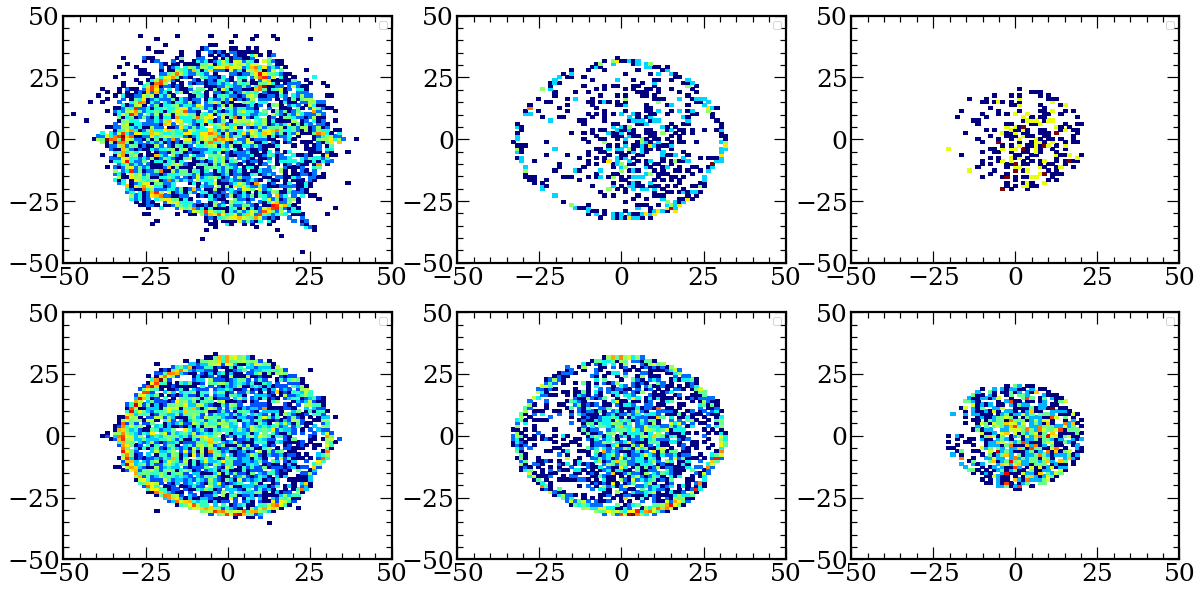

In [11]:
fig, [[ax1, ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2,3,figsize=(20,10),sharex=False, sharey=False)

#print(axes)

plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

for ax in [ax1, ax2, ax3, ax4,ax5,ax6]:

        #ax = plt.gca()
        ax.tick_params(axis = 'both')
        
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2.2)
        
        ax.xaxis.set_minor_locator(AutoMinorLocator(5)) 
        ax.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        ax.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
        ax.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)
    
    
    


bins_x = np.linspace(-50,50,80)
bins_y = np.linspace(-50,50,80)
bins_x_cut = np.linspace(-35,35,80)
bins_y_cut = np.linspace(-35,35,80)



counts_1, _, _ = np.histogram2d(x_positions_1_all['00230'],y_positions_1_all['00230'], bins=(bins_x, bins_y))
counts_2, _, _ = np.histogram2d(x_positions_2_all['00230'],y_positions_2_all['00230'], bins=(bins_x, bins_y))
counts_3, _, _ = np.histogram2d(x_positions_3_all['00230'],y_positions_3_all['00230'], bins=(bins_x, bins_y))

counts_4, _, _ = np.histogram2d(x_positions_1_all['00250'],y_positions_1_all['00250'], bins=(bins_x, bins_y))
counts_5, _, _ = np.histogram2d(x_positions_2_all['00250'],y_positions_2_all['00250'], bins=(bins_x, bins_y))
counts_6, _, _ = np.histogram2d(x_positions_3_all['00250'],y_positions_3_all['00250'], bins=(bins_x, bins_y))


im1 = ax1.pcolormesh(bins_x, bins_y, counts_1.T, norm=mpl.colors.LogNorm(), cmap = 'jet', label = len(x_positions_1_all['00230']))
im2 = ax2.pcolormesh(bins_x, bins_y, counts_2.T, norm=mpl.colors.LogNorm(), cmap = 'jet', label = len(x_positions_2_all['00230']))
im3 = ax3.pcolormesh(bins_x, bins_y, counts_3.T, norm=mpl.colors.LogNorm(), cmap = 'jet', label = len(x_positions_3_all['00230']))
im4 = ax4.pcolormesh(bins_x, bins_y, counts_4.T, norm=mpl.colors.LogNorm(), cmap = 'jet', label = len(x_positions_1_all['00250']))
im5 = ax5.pcolormesh(bins_x, bins_y, counts_5.T, norm=mpl.colors.LogNorm(), cmap = 'jet', label = len(x_positions_2_all['00250']))
im6 = ax6.pcolormesh(bins_x, bins_y, counts_6.T, norm=mpl.colors.LogNorm(), cmap = 'jet', label = len(x_positions_3_all['00250']))


#cb = plt.colorbar(im, ax=axes2, label='Counts')
# cb = plt.colorbar(im1, ax=ax1, label='Counts/bin')
# cb.set_label('Counts',size=20)
# cb.ax.tick_params(labelsize=20)
#ax.plot([], [], ' ', label="number of entries: "+str(len(x_position)))

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im4, cax=cbar_ax)
# #cbar_ax = plt.colorbar(im1, ax=ax1, label='Counts/bin')
# cbar_ax.set_label('Counts',size=20)
# cbar_ax.ax.tick_params(labelsize=20)




for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:

    ax.legend(prop={'size': 10})

print(len(x_positions_1_all['00230']))
print(len(x_positions_2_all['00230']))
print(len(x_positions_3_all['00230']))
print(len(x_positions_1_all['00158']))
print(len(x_positions_2_all['00158']))
print(len(x_positions_3_all['00158']))
print(len(x_positions_1_all['00162']))
print(len(x_positions_2_all['00162']))
print(len(x_positions_3_all['00162']))
plt.show()


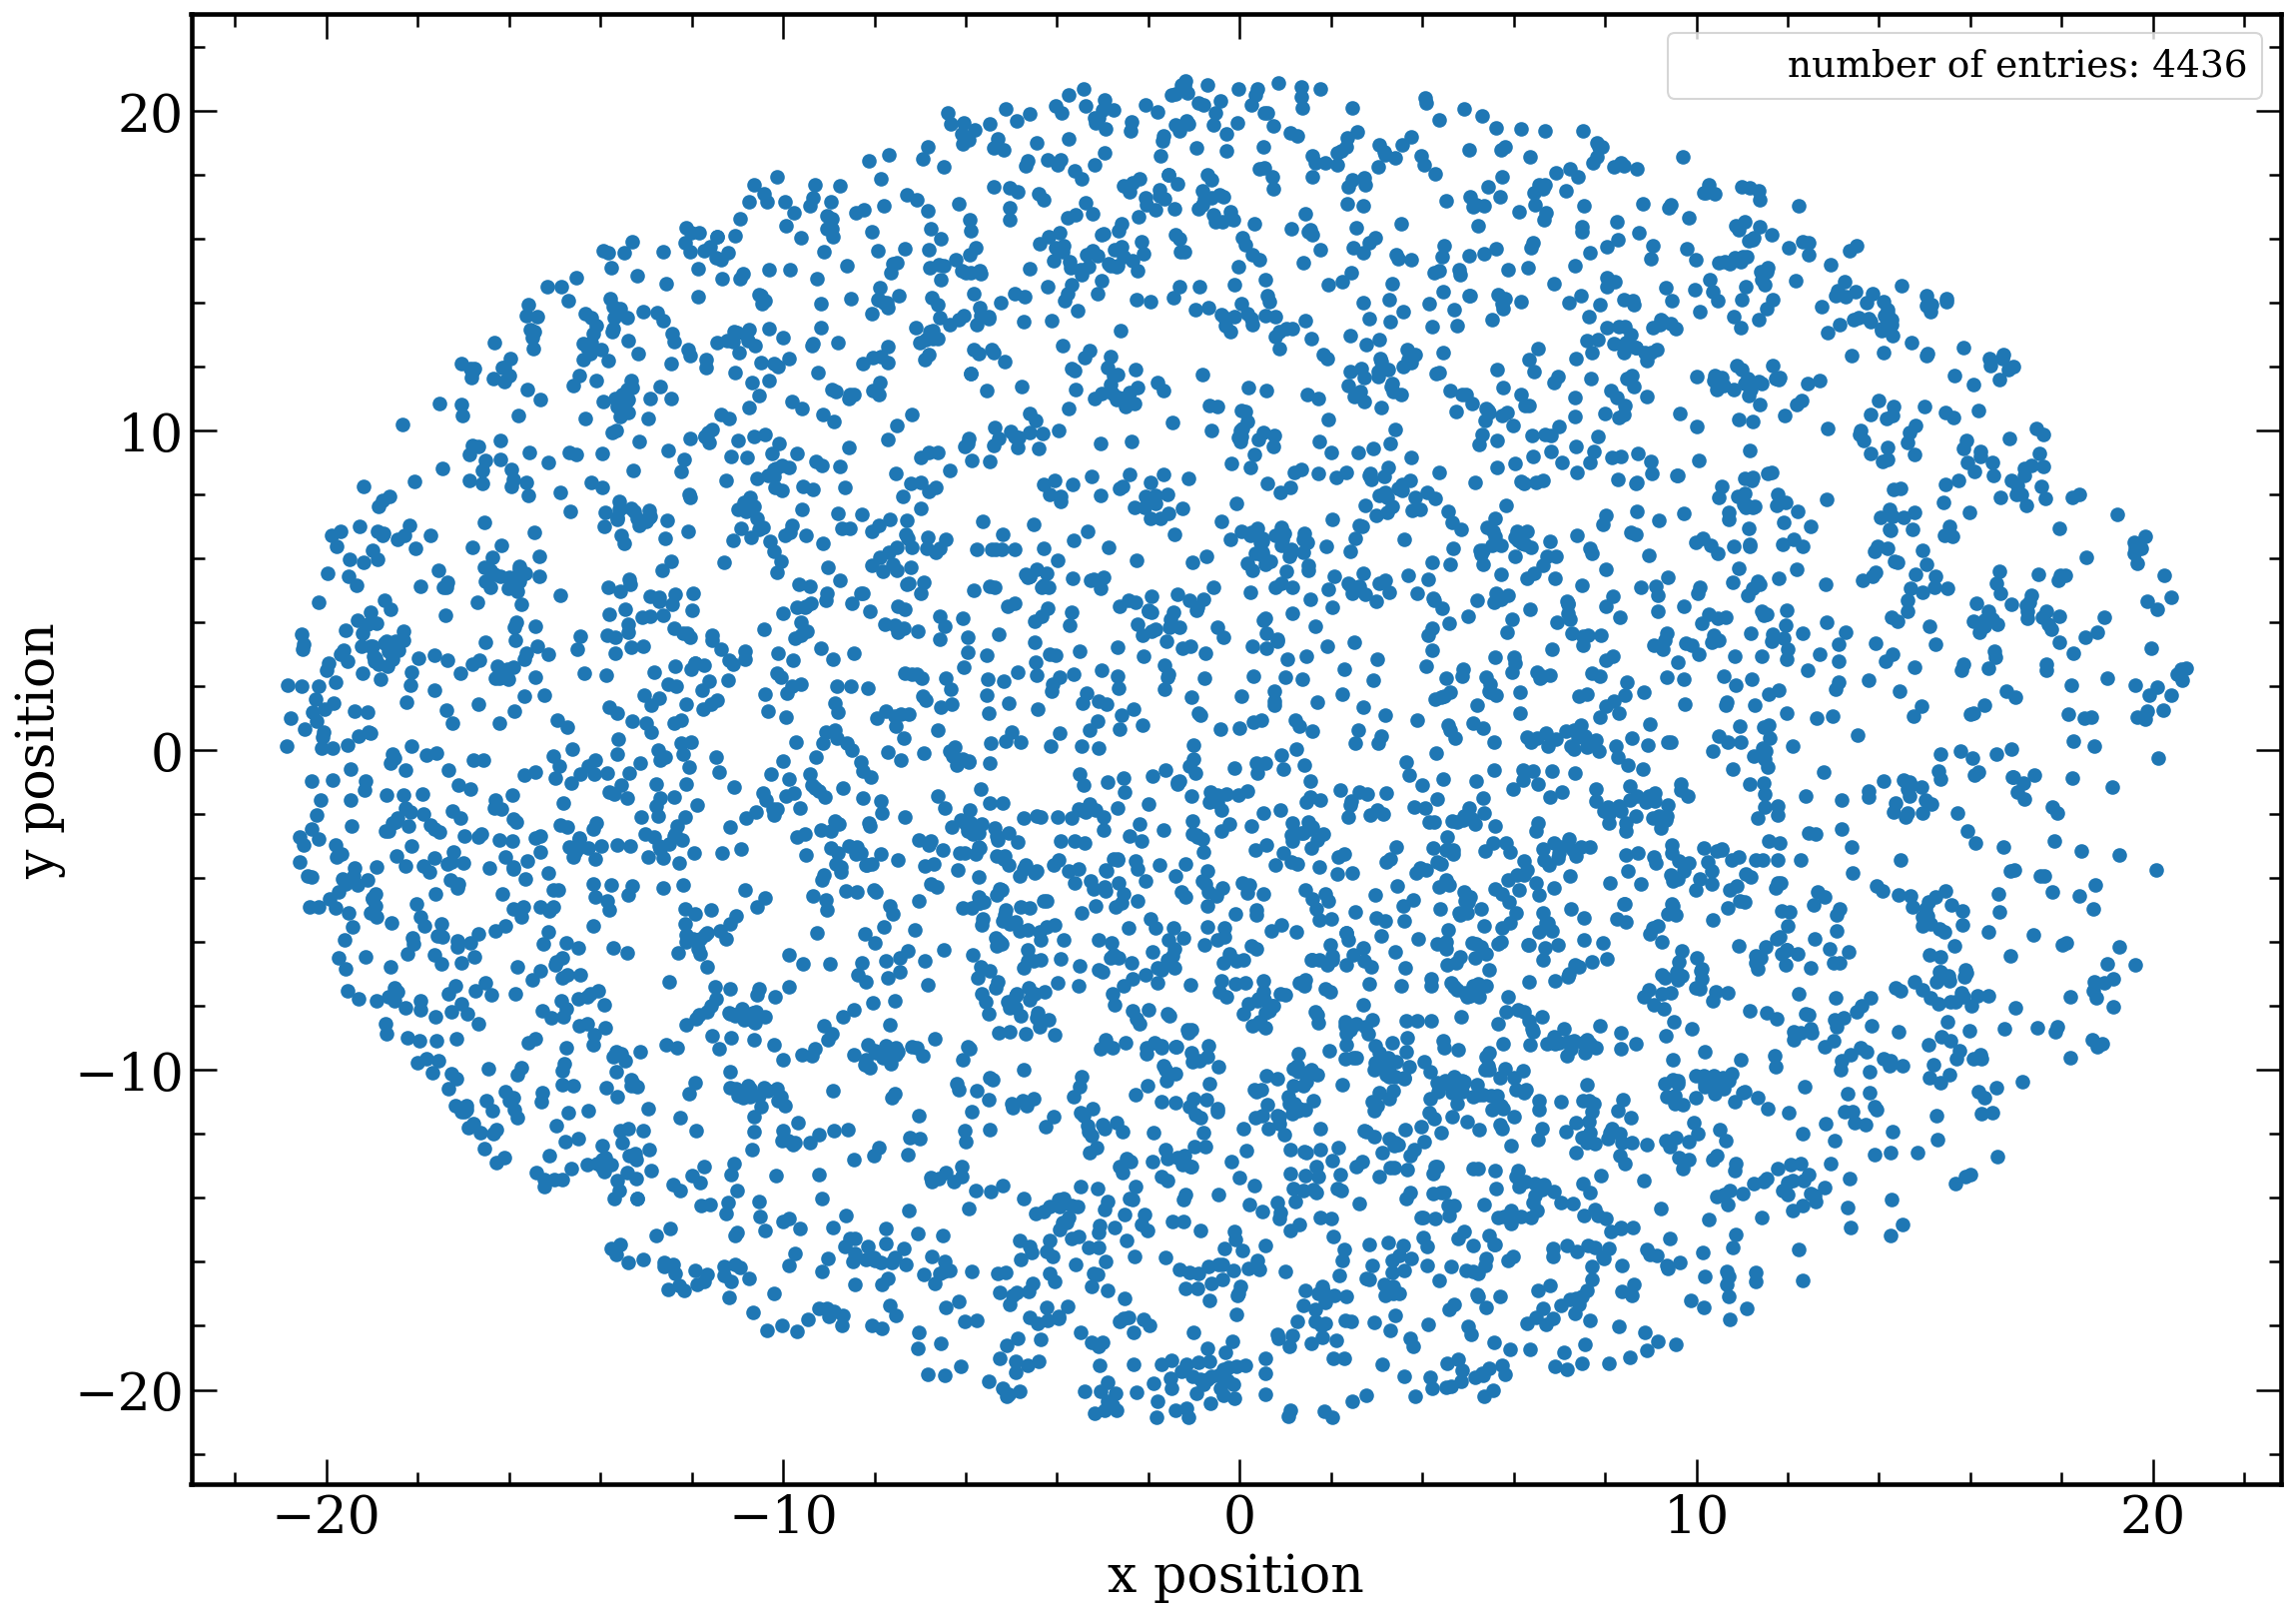

In [13]:
fig, axes = ps.styles()


bins_x = np.linspace(-35,35,80)
bins_y = np.linspace(-35,35,80)

run_id = '00158'


axes.scatter(x_positions_1_cut_all[run_id],y_positions_1_cut_all[run_id])





axes.plot([], [], ' ', label="number of entries: "+str(len(x_positions_1_cut_all[run_id])))
axes.set_xlabel('x position')
axes.set_ylabel('y position')

currentAxis = plt.gca()
circle = plt.Circle((0., 0.), 35., color='gray', linestyle = '-', fill=False)
currentAxis.add_artist(circle)


axes.legend(prop={'size': 18})

plt.show()
